# testing different models for accuracy

In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import scipy as sp
from joblib import dump
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("cs1_part3_res.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Columns: 229 entries, ms_subclass to sale_condition_Partial
dtypes: float64(38), int64(191)
memory usage: 5.1 MB


# lasso

In [4]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
lasso_model = Lasso()

In [7]:
lasso_model.fit(X_train,y_train)

Lasso()

In [8]:
pred_test_lasso = lasso_model.predict(X_test)

In [9]:
pred_test_lasso

array([12.02148188, 12.02148188, 12.02148188, 12.02148188, 12.02148188,
       12.02148188, 12.02148188, 12.02148188, 12.02148188, 12.02148188,
       12.02148188, 12.02148188, 12.02148188, 12.02148188, 12.02148188,
       12.02148188, 12.02148188, 12.02148188, 12.02148188, 12.02148188,
       12.02148188, 12.02148188, 12.02148188, 12.02148188, 12.02148188,
       12.02148188, 12.02148188, 12.02148188, 12.02148188, 12.02148188,
       12.02148188, 12.02148188, 12.02148188, 12.02148188, 12.02148188,
       12.02148188, 12.02148188, 12.02148188, 12.02148188, 12.02148188,
       12.02148188, 12.02148188, 12.02148188, 12.02148188, 12.02148188,
       12.02148188, 12.02148188, 12.02148188, 12.02148188, 12.02148188,
       12.02148188, 12.02148188, 12.02148188, 12.02148188, 12.02148188,
       12.02148188, 12.02148188, 12.02148188, 12.02148188, 12.02148188,
       12.02148188, 12.02148188, 12.02148188, 12.02148188, 12.02148188,
       12.02148188, 12.02148188, 12.02148188, 12.02148188, 12.02

In [10]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [11]:
MAE_Lasso

0.31075561189765727

In [12]:
MSE_Lasso

0.15790589321041712

In [13]:
RMSE_Lasso

0.39737374499382455

In [14]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [15]:
LR_MAPElasso= MAPE(y_test,pred_test_lasso)

In [16]:
print("lassocv MAPE: ",LR_MAPElasso)

lassocv MAPE:  2.5912655430698592


In [17]:
accuracy1= round(r2_score(y_test, pred_test_lasso), 2)
accuracy1= accuracy1 * 100
accuracy1

-0.0

# lasso cv

In [18]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
lasso_model = LassoCV()

In [21]:
lasso_model.fit(X_train,y_train)

LassoCV()

In [22]:
pred_test_lasso = lasso_model.predict(X_test)

In [23]:
pred_test_lasso

array([11.07996105, 12.54479967, 12.53227869, 12.31174785, 11.50185452,
       12.1646356 , 11.82335552, 11.92891394, 13.13857666, 12.74672419,
       11.63533411, 11.91698972, 11.38033338, 12.29360183, 11.84104565,
       12.70196848, 12.14459606, 12.20637662, 11.66018428, 12.03174497,
       12.77179282, 11.76595381, 12.15265288, 11.90715783, 11.39911061,
       12.51823231, 11.87845771, 11.64085876, 12.12417788, 12.02036855,
       12.04000021, 12.66680406, 12.0400895 , 11.73749185, 11.71764786,
       12.66923929, 11.87931527, 12.07803357, 12.21135039, 12.31110414,
       12.01639868, 11.31298762, 11.789639  , 11.4181084 , 12.15922387,
       11.49895867, 11.63713221, 12.1060782 , 11.75088342, 12.50887147,
       11.45832993, 11.98278829, 12.15142958, 12.29912604, 11.59773271,
       11.37608021, 12.35190975, 11.83743376, 11.83731163, 11.79772042,
       12.22659926, 11.70997535, 12.15494281, 11.85776081, 12.23453663,
       11.84046297, 12.47110887, 12.17958817, 11.86655786, 12.28

In [24]:
MAE_Lasso = mean_absolute_error(y_test,pred_test_lasso)
MSE_Lasso = mean_squared_error(y_test,pred_test_lasso)
RMSE_Lasso = np.sqrt(MSE_Lasso)

In [25]:
MAE_Lasso

0.07534249878300636

In [26]:
MSE_Lasso

0.011142277669986853

In [27]:
RMSE_Lasso

0.1055569877837884

In [28]:
def MAPE(y_test,pred_test_lasso):
    mape = np.mean(np.abs((y_test - pred_test_lasso)/y_test))*100
    return mape

In [29]:
LR_MAPElassocv= MAPE(y_test,pred_test_lasso)

In [30]:
print("lassocv MAPE: ",LR_MAPElassocv)

lassocv MAPE:  0.6318260623063565


In [31]:
print("Best alpha using built-in LassoCV: %f" % lasso_model.alpha_)
print("Best score using built-in LassoCV: %f" %lasso_model.score(X,y))
coef = pd.Series(lasso_model.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.002315
Best score using built-in LassoCV: -2315483.577322


In [32]:
test_pred=y_test-pred_test_lasso

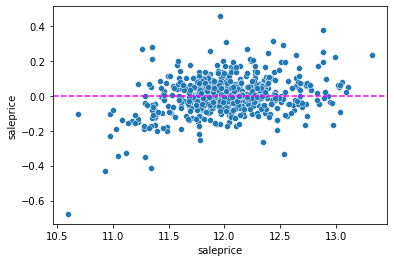

In [33]:
sns.scatterplot(x=y_test,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

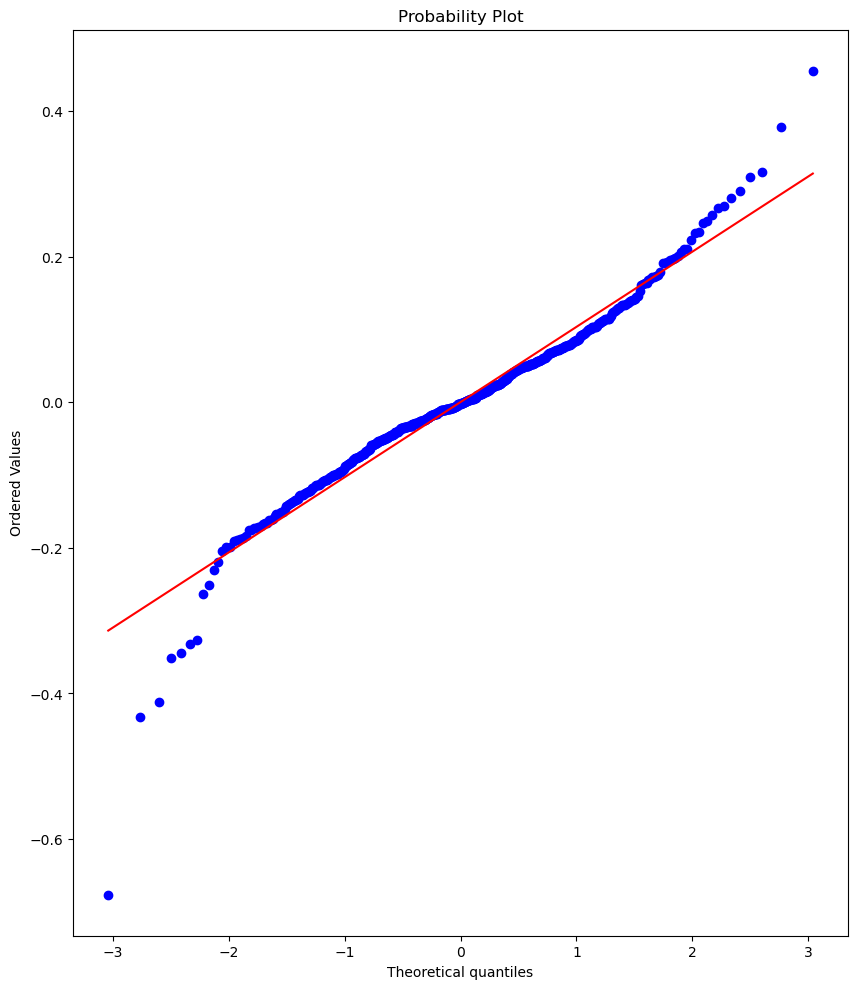

In [34]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_pred,plot=ax)

In [35]:
100*RMSE_Lasso/df['saleprice'].mean()

0.878153175795918

In [36]:
accuracy2= round(r2_score(y_test, pred_test_lasso), 2)
accuracy2= accuracy2 * 100
accuracy2

93.0

# linear regression

In [37]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
linear_model = LinearRegression()

In [40]:
linear_model.fit(X_train,y_train)

LinearRegression()

In [41]:
pred_linear_model = linear_model.predict(X_test)

In [42]:
pred_linear_model

array([1.14230172e+01, 1.18975427e+01, 1.18259408e+01, 1.29354989e+01,
       1.19067132e+01, 1.25724923e+01, 1.18089234e+01, 1.26474892e+01,
       1.20742471e+01, 1.24116036e+01, 1.16381356e+01, 1.17399651e+01,
       1.27734200e+01, 1.16508157e+01, 1.30628793e+01, 1.14102685e+01,
       1.23455865e+01, 1.29476907e+01, 1.24430291e+01, 1.21277367e+01,
       1.21450555e+01, 1.16966378e+01, 1.16053407e+01, 1.15195672e+01,
       1.20839135e+01, 1.23544976e+01, 1.13057305e+01, 1.21613595e+01,
       1.17070825e+01, 1.18606011e+01, 1.18507974e+01, 1.21763436e+01,
       1.24554116e+01, 1.21850106e+01, 1.19823243e+01, 1.22711999e+01,
       1.26325280e+01, 1.15633447e+01, 1.13840310e+01, 1.19061715e+01,
       1.14756524e+01, 1.16530206e+01, 1.22616708e+01, 1.18533761e+01,
       1.22080514e+01, 1.19603631e+01, 1.27662637e+01, 1.25562875e+01,
       1.17890145e+01, 1.17278420e+01, 1.16136186e+01, 1.18100411e+01,
       1.22984902e+01, 1.21584298e+01, 1.20763680e+01, 1.29331872e+01,
      

In [43]:
MAE_Lr = mean_absolute_error(y_test,pred_linear_model)
MSE_Lr = mean_squared_error(y_test,pred_linear_model)
RMSE_Lr = np.sqrt(MSE_Lr)

In [44]:
MAE_Lr

13620614442.803099

In [45]:
MSE_Lr

3.062056189768481e+22

In [46]:
RMSE_Lr

174987319248.23813

In [47]:
def MAPE(y_test,pred_linear_model):
    mape = np.mean(np.abs((y_test - pred_linear_model)/y_test))*100
    return mape

In [48]:
LR_MAPE= MAPE(y_test,pred_linear_model)

In [49]:
print("MAPE: ",LR_MAPE)

MAPE:  118122382698.38686


In [50]:
#print("Best alpha using built-in LassoCV: %f" % linear_model.alpha_)
print("Best score using built-in LassoCV: %f" %linear_model.score(X,y))
coef = pd.Series(linear_model.coef_, index = X.columns)

Best score using built-in LassoCV: -550432936885781644595280478208.000000


In [51]:
test_pred=y_test-pred_linear_model

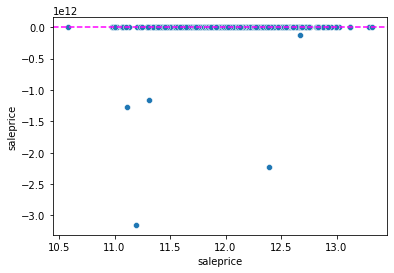

In [52]:
sns.scatterplot(x=y_test,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

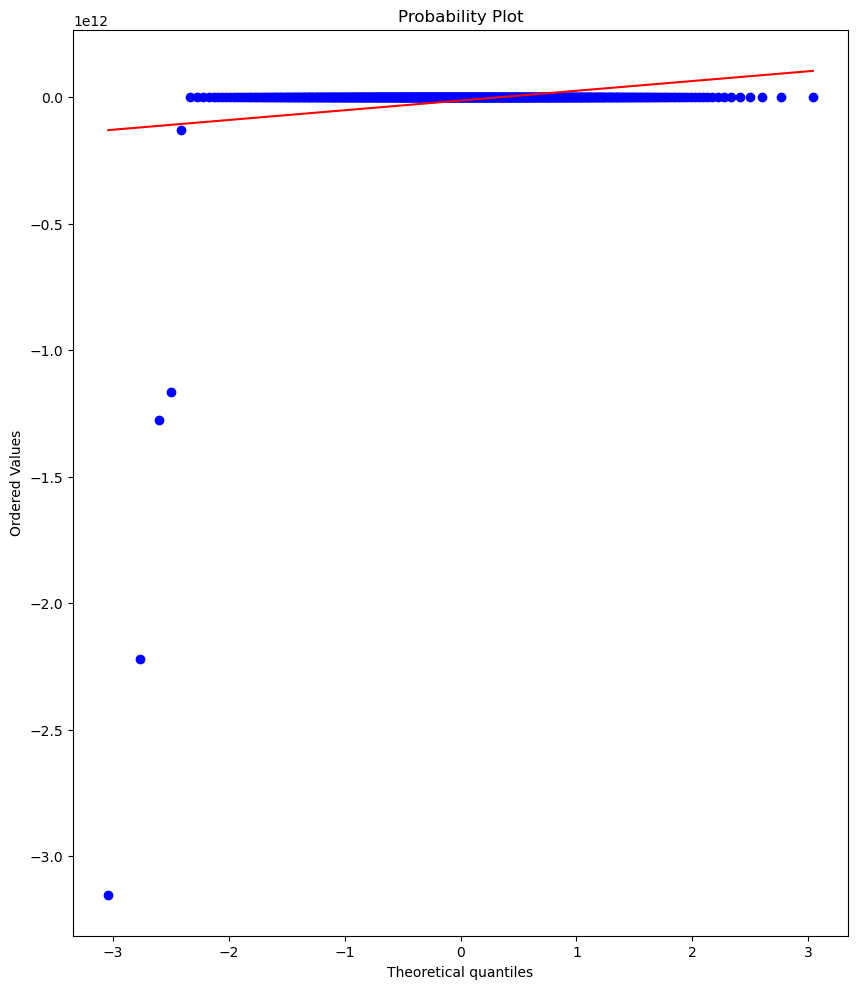

In [53]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_pred,plot=ax)

In [54]:
accuracy3= round(r2_score(y_test, pred_linear_model), 2)
accuracy3= accuracy3 * 100
accuracy3

-1.909109121509044e+25

# Grid search with elastic cv

In [55]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
#base_elastic_model = ElasticNet(max_iter=250000)
base_elastic_model = ElasticNet()

In [57]:
param_grid = {'alpha':[0.1,1,10,50,100],'l1_ratio':[0.1,0.5,0.7,0.9,1]}

In [58]:
#grid_model = GridSearchCV(estimator=base_elastic_model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=10,verbose=2)
grid_model = GridSearchCV(estimator=base_elastic_model,param_grid=param_grid,scoring='neg_mean_squared_error',cv=10,verbose=2)

In [59]:
grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.1 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.1, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .......................... alpha=0.1, l1_ratio=0.5, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.5 .........................................
[CV] .

[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.5 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.5, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] ............................ alpha=1, l1_ratio=0.7, total=   0.0s
[CV] alpha=1, l1_ratio=0.7 ...........................................
[CV] .

[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.7 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.7, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] alpha=10, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=10, l1_ratio=0.9, total=   0.0s
[CV] a

[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=0.9 ..........................................
[CV] ........................... alpha=50, l1_ratio=0.9, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] ............................. alpha=50, l1_ratio=1, total=   0.0s
[CV] alpha=50, l1_ratio=1 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    3.4s finished


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [60]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.1}

In [61]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.1)

In [62]:
y_pred = grid_model.predict(X_test)

In [63]:
mean_squared_error(y_test,y_pred)

0.015131194707162041

In [64]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

0.12300892125029811

In [65]:
test_prob = y_test - y_pred

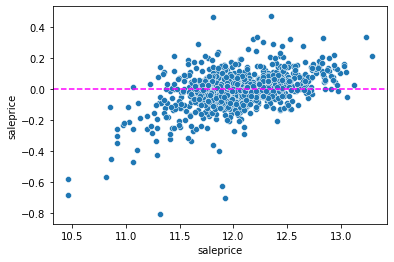

In [66]:
sns.scatterplot(x=y_test,y=test_prob)
plt.axhline(y=0,color='magenta',linestyle='--')

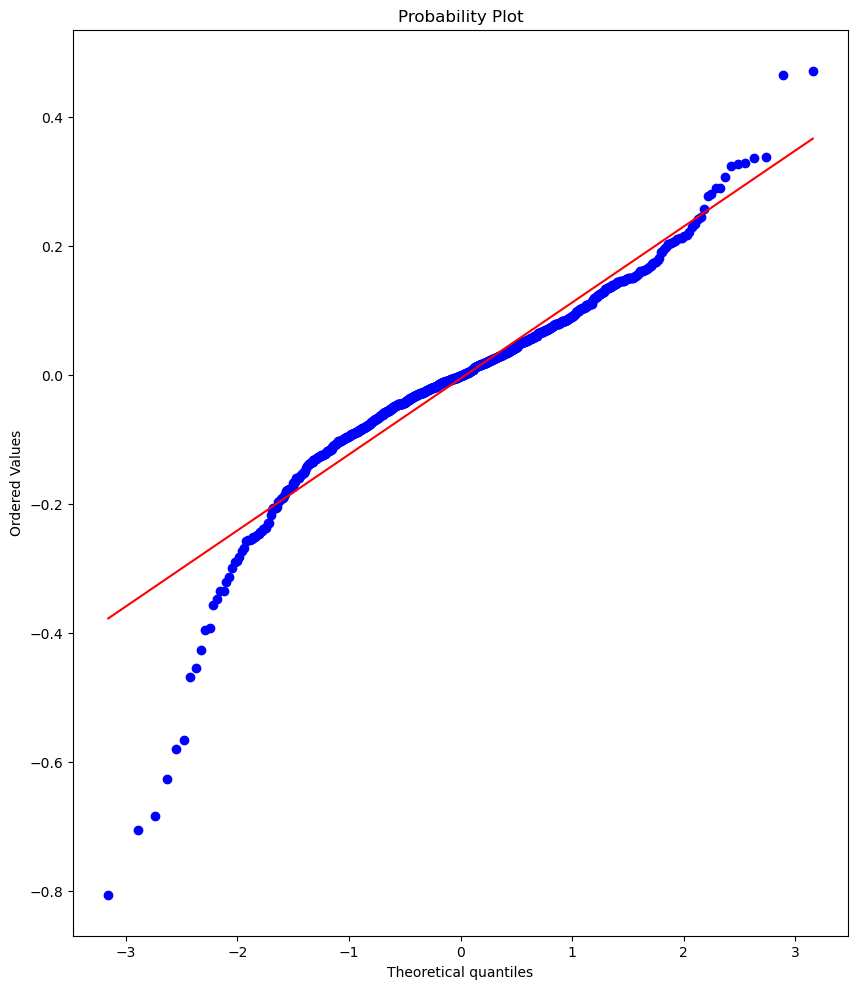

In [67]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_prob,plot=ax)

In [68]:
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

In [69]:
LR_MAPEgrid= MAPE(y_test,y_pred)

In [70]:
print("MAPE: ",LR_MAPEgrid)

MAPE:  0.7057076826881096


In [71]:
accuracy4= round(r2_score(y_test, y_pred), 2)
accuracy4= accuracy4 * 100
accuracy4

91.0

# Ridge model

In [72]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
ridge_model = Ridge(alpha=10)

In [74]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [75]:
pred_test_ridge = ridge_model.predict(X_test)

In [76]:
pred_test_ridge

array([12.28032305, 12.21209612, 11.8169125 , 12.74529642, 12.2486942 ,
       12.1185486 , 11.8198527 , 11.80551543, 12.77373065, 11.66545535,
       11.38818276, 11.87191883, 12.01778585, 12.04856259, 12.04086585,
       11.757755  , 12.41480552, 11.65287276, 11.9734333 , 12.00260672,
       12.01426194, 11.15102709, 11.53816212, 11.69703476, 11.87183857,
       12.61356406, 11.2147188 , 11.95990981, 12.42635219, 12.10711487,
       12.18467692, 12.62854762, 13.01531225, 12.20502288, 12.15987435,
       11.95018643, 12.35594277, 12.38944303, 12.15621839, 11.88449235,
       13.12919447, 11.67525466, 12.05307021, 11.87179565, 11.97634759,
       11.80756618, 11.91491932, 11.66166948, 11.70419214, 11.56596158,
       11.38860141, 11.54251258, 11.98966128, 12.70885744, 12.88490698,
       11.7617055 , 11.68466687, 12.05232639, 12.0187622 , 11.95361857,
       11.54705484, 11.74873464, 11.69932893, 11.92047681, 11.25540288,
       12.09543479, 12.31677772, 12.23617937, 12.28998738, 12.38

In [77]:
MAE_ridge = mean_absolute_error(y_test,pred_test_ridge)
MSE_ridge = mean_squared_error(y_test,pred_test_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)

In [78]:
MAE_ridge

0.08129374760770562

In [79]:
MSE_ridge

0.013943459886958137

In [80]:
RMSE_ridge

0.11808242835815216

In [81]:
def MAPE(y_test,pred_test_ridge):
    mape = np.mean(np.abs((y_test - pred_test_ridge)/y_test))*100
    return mape

In [82]:
LR_MAPEridge= MAPE(y_test,pred_test_ridge)

In [83]:
print("MAPE: ",LR_MAPEridge)

MAPE:  0.6825102730173717


In [84]:
test_pred=y_test-pred_test_ridge

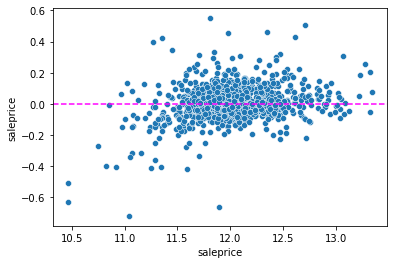

In [85]:
sns.scatterplot(x=y_test,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

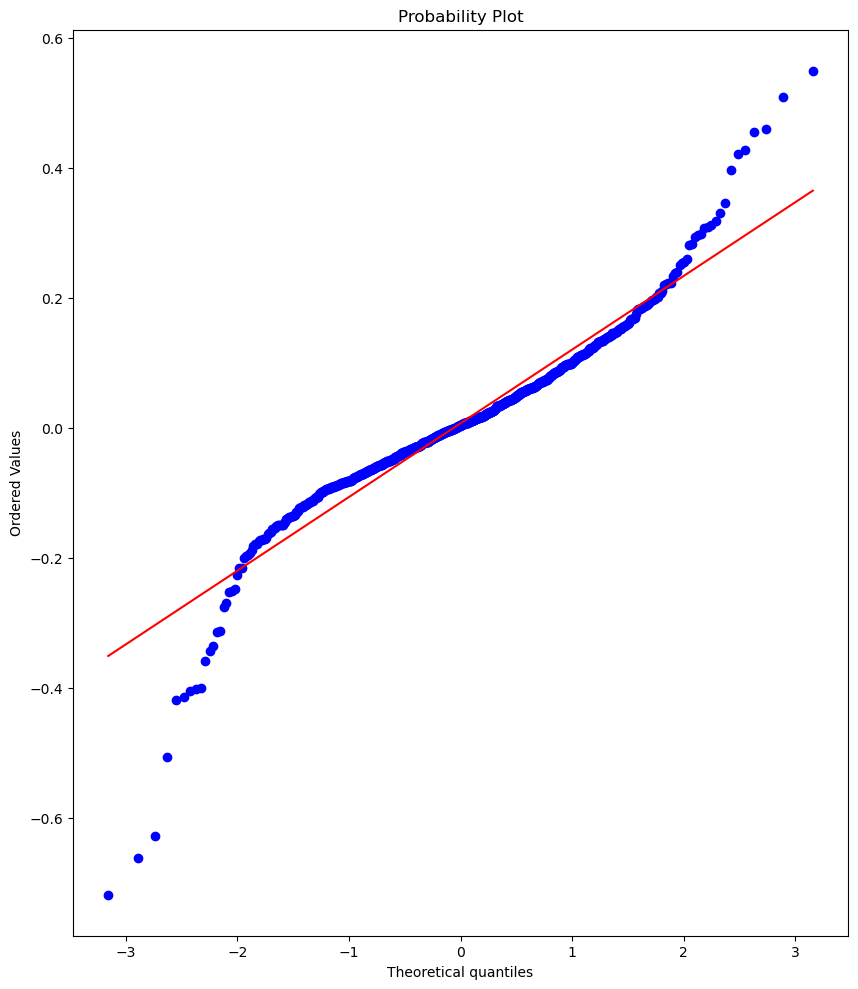

In [86]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_pred,plot=ax)

In [87]:
accuracy5= round(r2_score(y_test, pred_test_ridge), 2)
accuracy5= accuracy5 * 100
accuracy5

92.0

# elastic model

In [88]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
elastic_model = ElasticNet()

In [90]:
elastic_model.fit(X_train,y_train)

ElasticNet()

In [91]:
pred_test_elastic = elastic_model.predict(X_test)

In [92]:
pred_test_elastic

array([12.02211374, 12.02211374, 12.02211374, 12.02211374, 12.02211374,
       12.02211374, 12.02211374, 12.02211374, 12.02211374, 12.02211374,
       12.02211374, 12.02211374, 12.02211374, 12.02211374, 12.02211374,
       12.02211374, 12.02211374, 12.02211374, 12.02211374, 12.02211374,
       12.02211374, 12.02211374, 12.02211374, 12.02211374, 12.02211374,
       12.02211374, 12.02211374, 12.02211374, 12.02211374, 12.02211374,
       12.02211374, 12.02211374, 12.02211374, 12.02211374, 12.02211374,
       12.02211374, 12.02211374, 12.02211374, 12.02211374, 12.02211374,
       12.02211374, 12.02211374, 12.02211374, 12.02211374, 12.02211374,
       12.02211374, 12.02211374, 12.02211374, 12.02211374, 12.02211374,
       12.02211374, 12.02211374, 12.02211374, 12.02211374, 12.02211374,
       12.02211374, 12.02211374, 12.02211374, 12.02211374, 12.02211374,
       12.02211374, 12.02211374, 12.02211374, 12.02211374, 12.02211374,
       12.02211374, 12.02211374, 12.02211374, 12.02211374, 12.02

In [93]:
MAE_elastic = mean_absolute_error(y_test,pred_test_elastic)
MSE_elastic = mean_squared_error(y_test,pred_test_elastic)
RMSE_elastic = np.sqrt(MSE_ridge)

In [94]:
MAE_elastic

0.32613970575528467

In [95]:
MSE_elastic

0.17612696680201265

In [96]:
RMSE_elastic

0.11808242835815216

In [97]:
def MAPE(y_test,pred_test_elastic):
    mape = np.mean(np.abs((y_test - pred_test_elastic)/y_test))*100
    return mape

In [98]:
LR_MAPEelastic= MAPE(y_test,pred_test_elastic)

In [99]:
print("MAPE: ",LR_MAPEelastic)

MAPE:  2.7172074245042377


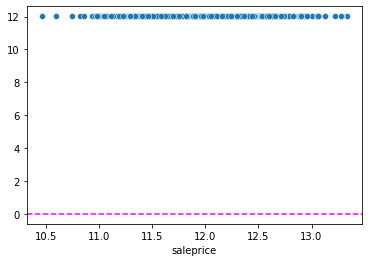

In [100]:
sns.scatterplot(x=y_test,y=pred_test_elastic)
plt.axhline(y=0,color='magenta',linestyle='--')

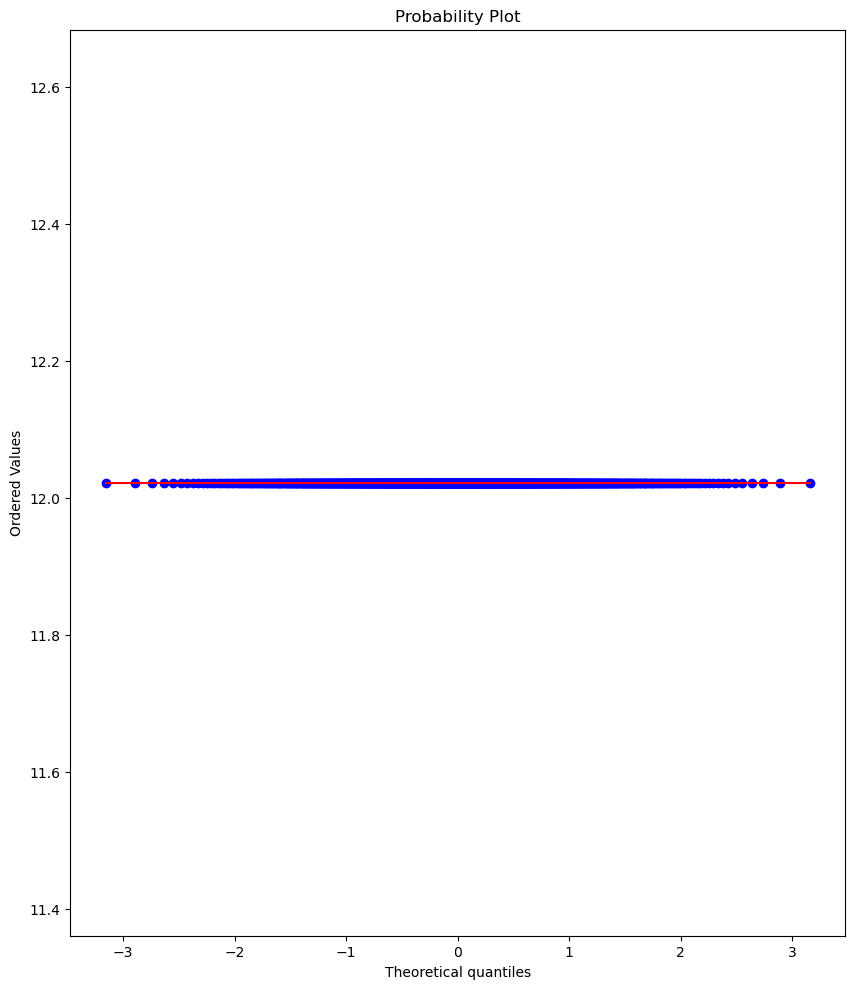

In [101]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(pred_test_elastic,plot=ax)

In [102]:
accuracy6= round(r2_score(y_test, pred_test_elastic), 2)
accuracy6= accuracy6 * 100
accuracy6

-0.0

# ridge cv

In [103]:
#Create  and y 
X = df.drop('saleprice',axis=1)
y = df['saleprice']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
ridgecv_model = RidgeCV()

In [105]:
ridgecv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [106]:
pred_test_ridgecv = ridgecv_model.predict(X_test)

In [107]:
pred_test_ridgecv

array([12.56003455, 12.14453464, 13.00955195, 11.71029618, 12.1456205 ,
       11.71730951, 11.98748892, 11.90477838, 11.71617721, 11.90686168,
       12.62411699, 12.03758337, 12.06527753, 11.93468707, 12.31057633,
       12.74069019, 11.87629146, 12.05219267, 12.50034301, 12.16176517,
       11.60628435, 12.40835938, 12.26548251, 12.71949858, 11.97846714,
       12.27776006, 11.72219111, 11.49823948, 11.89898095, 11.49859656,
       12.61470469, 12.15717895, 11.56960066, 11.34287126, 11.82988346,
       13.06814194, 12.17134497, 12.47177942, 11.29342903, 11.8477346 ,
       11.66203644, 11.90831221, 12.19203594, 12.1915015 , 11.86523183,
       12.06743872, 11.91477519, 11.820659  , 12.06736757, 12.88475915,
       11.86071677, 12.01459753, 12.17174009, 12.01169364, 12.49460615,
       11.98476053, 11.53228049, 12.51550717, 11.85747001, 11.50736778,
       11.83166396, 12.31147421, 12.13478842, 12.09091101, 12.16495659,
       12.27731232, 12.2396153 , 11.85836518, 12.25506634, 11.82

In [108]:
MAE_ridgecv = mean_absolute_error(y_test,pred_test_ridgecv)
MSE_ridgecv = mean_squared_error(y_test,pred_test_ridgecv)
RMSE_ridgecv = np.sqrt(MSE_ridge)

In [109]:
MAE_ridgecv

0.08076591346233242

In [110]:
MSE_ridgecv 

0.012996501389683054

In [111]:
RMSE_ridgecv 

0.11808242835815216

In [112]:
def MAPE(y_test,pred_test_ridgecv):
    mape = np.mean(np.abs((y_test - pred_test_elastic)/y_test))*100
    return mape

In [113]:
LR_MAPEridgecv= MAPE(y_test,pred_test_ridgecv)

In [114]:
print("MAPE: ",LR_MAPEridgecv)

MAPE:  2.6315873790874886


In [115]:
test_pred=y_test-pred_test_ridgecv

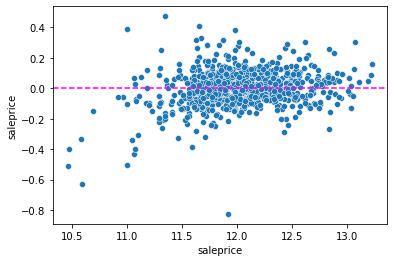

In [116]:
sns.scatterplot(x=y_test,y=test_pred)
plt.axhline(y=0,color='magenta',linestyle='--')

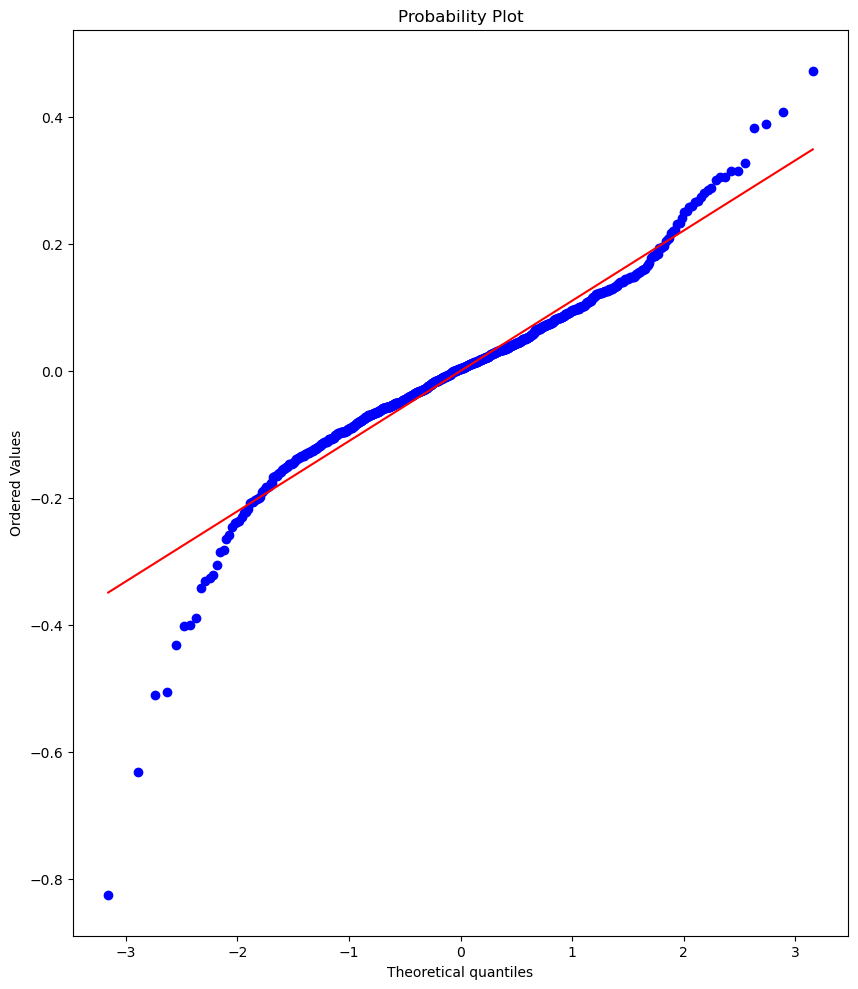

In [117]:
fig,ax = plt.subplots(figsize=(10,12),dpi=100)

_=sp.stats.probplot(test_pred,plot=ax)

In [118]:
accuracy7= round(r2_score(y_test, pred_test_ridgecv), 2)
accuracy7= accuracy7 * 100
accuracy7

92.0

In [119]:
print("lasso: ",LR_MAPElasso, "accuracy: ",accuracy1)

lasso:  2.5912655430698592 accuracy:  -0.0


In [120]:
print("lasso cv: \t",LR_MAPElassocv, "accuracy: ",accuracy2)

lasso cv: 	 0.6318260623063565 accuracy:  93.0


In [121]:
print("Linear regression\t",LR_MAPE, "accuracy: ",accuracy3)


Linear regression	 118122382698.38686 accuracy:  -1.909109121509044e+25


In [122]:
print("Gridcv with elastic :\t",LR_MAPEgrid, "accuracy: ",accuracy4)


Gridcv with elastic :	 0.7057076826881096 accuracy:  91.0


In [123]:
print("ridge :\t",LR_MAPEridge, "accuracy: ",accuracy5)


ridge :	 0.6825102730173717 accuracy:  92.0


In [124]:
print("elastic :\t",LR_MAPEelastic, "accuracy: ",accuracy6)


elastic :	 2.7172074245042377 accuracy:  -0.0


In [125]:
print("ridge cv: \t",LR_MAPEridgecv, "accuracy: ",accuracy7)

ridge cv: 	 2.6315873790874886 accuracy:  92.0
